# COGS 108 - EDA Checkpoint

# Names

- Kairi Sageshima
- Brandon Wang
- Marisol Jimenez
- Ashley Chu
- Daniel Milton

<a id='research_question'></a>
# Research Question

*Which factor is most influential in predicting the likelihood of a forest fire in the Northern Region (Department of Forestry and Fire Protection) of California: temperature or precipitation in the region? Can we use such variables to predict and serve as an early warning system for wildfires in California?*

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import the wildfire data csv
df = pd.read_csv('fire.csv')
## Import the temperature data csv
dfw = pd.read_csv('temp.csv')
## Import the precipitation data csv
dfp = pd.read_csv('precipitation.csv')

df

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPE_Length,SHAPE_Area
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,2020/06/18 00:00:00+00,2020/06/23 00:00:00+00,11.0,NaN,110.0,109.602500,1.0,1.0,NaN,4179.743142,-7.331347e+05
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,2020/06/01 00:00:00+00,2020/06/04 00:00:00+00,2.0,NaN,670.0,685.585020,1.0,1.0,NaN,12399.375391,-4.578172e+06
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,2020/08/10 00:00:00+00,2020/03/01 00:00:00+00,14.0,NaN,26.0,27.300480,1.0,1.0,NaN,2119.194120,-1.823876e+05
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,2020/03/31 00:00:00+00,2020/04/01 00:00:00+00,9.0,NaN,13.0,12.931550,1.0,1.0,NaN,2029.524881,-8.667942e+04
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,2020/04/14 00:00:00+00,2020/04/19 00:00:00+00,18.0,NaN,10.3,10.315960,1.0,1.0,NaN,1342.742903,-7.017912e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21313,42760,2019.0,CA,CCO,LAC,MUREAU,NaN,2019/10/30 00:00:00+00,2019/10/30 00:00:00+00,NaN,NaN,NaN,6.297734,NaN,1.0,NaN,897.323534,-3.730642e+04
21314,42761,2019.0,CA,LRA,NaN,OAK,NaN,2019/10/28 00:00:00+00,2019/10/28 00:00:00+00,14.0,NPS#596 Rapid ROS in light grassy 1yr old fuels,NaN,8.482671,8.0,1.0,NaN,1215.382952,-5.024716e+04
21315,42762,2019.0,CA,LRA,LDF,BARHAM,00000845,2019/11/09 00:00:00+00,2019/11/10 00:00:00+00,14.0,LACFD 0845,NaN,64.888229,8.0,1.0,NaN,4093.657796,-3.843117e+05
21316,42763,2019.0,CA,NPS,MNP,STAR,00013598,NaN,NaN,14.0,NaN,NaN,66.587181,8.0,1.0,NaN,4777.042672,-4.051741e+05


# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# County Dictionary
county_dict = {
    'Yuba County': 'NEU',
    'Nevada County': 'NEU',
    'Placer County': 'NEU',
    'Butte County' : 'BTU',
    'San Mateo County' : 'CZU',
    'Santa Cruz County' : 'CZU',
    'Mendocino County' : 'MEU',
    'Humboldt County' : 'HUU',
    'Del Norte County' : 'HUU',
    'Tehama County' : 'TGU',
    'Glenn County' : 'TGU',
    'Lassen County' : 'LMU',
    'Modoc County' : 'LMU',
    'Siskiyou County' : 'SKU',
    'Shasta County' : 'SHU',
    'Trinity County' : 'SHU',
    'Santa Clara County' : 'SCU',
    'Sonoma County' : 'LNU',
    'Lake County' : 'LNU',
    'Napa County' : 'LNU',
    'Marin County' : 'MRN',
    'El Dorado County' : 'AEU',
    'Amador County' : 'AEU'
}

# Counties we are interested in
# counties = ['SKU', 'HUU', 'SHU', 'LMU', 'TGU', 'MEU', 'BTU', 'NEU', 'AEU', 'LNU', 'SHF', 'TNF', 'PNF', 'HIA', 'LNF',
#            'KNF', 'MNF', 'SRF', 'BNP', 'RNP']
counties = ['SKU', 'HUU', 'SHU', 'LMU', 'TGU', 'MEU', 'BTU', 'NEU', 'AEU', 'LNU']

## Cleaning fire dataset

In [4]:
## Cleaning fire data set
# Rename columns
df = df.rename(columns = {'UNIT_ID' : 'county'})
# Drop unused columns
df = df.drop(columns = ['OBJECTID', 'AGENCY', 'INC_NUM', 'COMMENTS', 'REPORT_AC', 'SHAPE_Length', 'SHAPE_Area', 'FIRE_NUM', 'OBJECTIVE', 'C_METHOD'])
df = df.reset_index()
# Change to lowercase
df.columns = df.columns.str.lower()
# Only want the counties interested in
df = df[df['county'].isin(counties)]
# Convert dates into ints
df['alarm_date'] = pd.to_datetime(df['alarm_date'])
df['date_conv'] = (df['alarm_date'].dt.year.fillna(0).astype(int)).astype(str) + (df['alarm_date'].dt.month.fillna(0).astype(int)).astype(str)
df['date_conv'] = df['date_conv'].astype(int)
df = df.drop(columns = ['year_', 'alarm_date', 'cont_date'])
# Only want 2018 - 2020
df = df[df.date_conv > 201800]
df = df[df.date_conv < 202100]
# Drop NA values
df = df.dropna()

## Cleaning weather data set 

In [5]:
# Drop unused columns
dfw = dfw.drop(columns = ['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean']) 
# Rename columns
dfw = dfw.rename(columns = {'Location':'county', 'Value':'temperature'})
# Create ‘region’ column
dfw.assign(region = '')
# Change to lowercase
dfw.columns = dfw.columns.str.lower()

# Function to change County full name to county ID in temp.csv
def County_toID(county):
       if county in county_dict:
            return county.replace(county, county_dict[county])

# Convert counties to regions
new_county = dfw['county'].apply(County_toID)
dfw['region'] = new_county

# Filter out dates
dfw = dfw[dfw.date > 201800]
dfw = dfw[dfw.date < 202100]

# Drop NA values
dfw = dfw.dropna()


In [6]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv
12,12,CA,NEU,FIELDS,5.0,55.328430,202010
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010
34,34,CA,HUU,MINE,5.0,11.074130,202012
37,37,CA,BTU,GRAND,14.0,31.061090,202010
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010
47,47,CA,NEU,LOCUST,5.0,15.859510,202012
120,120,CA,SHU,POINT,9.0,48.147720,202010
127,127,CA,SHU,DERSCH,7.0,133.299500,202010
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010


In [7]:
dfw['region'].unique()

array(['AEU', 'BTU', 'HUU', 'TGU', 'LNU', 'LMU', 'MRN', 'MEU', 'NEU',
       'CZU', 'SCU', 'SHU', 'SKU'], dtype=object)

In [8]:
## Create a temp column for wildfires and grab data from temp dataset based on region

# Create ‘temp’ column
df.assign(temp = '')

temp_region = dfw.groupby(['region', 'date']).mean()
temp_region.loc['BTU', 201805]

# Function to get averages
# @param region
# @param date int
def getTempForRegion(region, date):
    return temp_region.loc[region, date]
        

# Apply function to temp column
df['temp'] = df.apply(lambda x: getTempForRegion(x['county'], x['date_conv']), axis=1)


In [9]:
temp_region.loc['AEU', 201805]

temperature    59.3
Name: (AEU, 201805), dtype: float64

In [10]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv,temp
12,12,CA,NEU,FIELDS,5.0,55.328430,202010,64.600000
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010,60.300000
34,34,CA,HUU,MINE,5.0,11.074130,202012,43.450000
37,37,CA,BTU,GRAND,14.0,31.061090,202010,68.400000
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010,64.600000
47,47,CA,NEU,LOCUST,5.0,15.859510,202012,43.800000
120,120,CA,SHU,POINT,9.0,48.147720,202010,61.800000
127,127,CA,SHU,DERSCH,7.0,133.299500,202010,61.800000
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010,66.200000
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010,66.200000


## Cleaning the precipitation dataset

In [11]:
# cleaning  and renaming columns 
dfp = dfp.drop(columns = ['Location ID', 'Rank','Anomaly (1901-2000 base period)', '1901-2000 Mean'])
dfp.head()

,Location,Date,Value
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20


In [12]:
# Rename columns
dfp = dfp.rename(columns = {'Location':'county', 'Value':'precipitation (inches)'})
# Create ‘region’ column
dfp.assign(region = '')

# Change to lowercase
dfp.columns = dfp.columns.str.lower()
dfp.head()

,county,date,precipitation (inches)
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20


In [13]:
# Function to change County full name to county ID in temp.csv
def County_toID(county):
       if county in county_dict:
            return county.replace(county, county_dict[county])

In [14]:
dfp['county'].apply(County_toID)

0        None
1        None
2        None
3        None
4        None
         ... 
88271     NEU
88272     NEU
88273     NEU
88274     NEU
88275     NEU
Name: county, Length: 88276, dtype: object

In [15]:
dfp

,county,date,precipitation (inches)
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20
...,...,...,...
88271,Yuba County,202106,0.02
88272,Yuba County,202107,0.01
88273,Yuba County,202108,0.00
88274,Yuba County,202109,0.23


In [16]:
# Convert counties to regions
new_county = dfp['county'].apply(County_toID)
dfp['region'] = new_county

# Filter out dates
dfp = dfp[dfp.date > 201800]
dfp = dfp[dfp.date < 202100]

# Drop NA values
dfp = dfp.dropna()


In [17]:
## Create a temp column for wildfires and grab data from temp dataset based on region
# Create ‘temp’ column
df.assign(precipitation = '')

prec_region = dfp.groupby(['region', 'date']).mean()
prec_region.loc['BTU', 201805]


precipitation (inches)    0.52
Name: (BTU, 201805), dtype: float64

In [18]:
# Function to get averages
# @param region
# @param date int
def getPrecForRegion(region, date):
    return prec_region.loc[region, date]
        

# Apply function to temp column
df['precipitation'] = df.apply(lambda x: getPrecForRegion(x['county'], x['date_conv']), axis=1)

In [19]:
len(df)

32



# Data Analysis & Results (EDA)

In [20]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv,temp,precipitation
12,12,CA,NEU,FIELDS,5.0,55.328430,202010,64.600000,0.010000
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010,60.300000,0.940000
34,34,CA,HUU,MINE,5.0,11.074130,202012,43.450000,8.435000
37,37,CA,BTU,GRAND,14.0,31.061090,202010,68.400000,0.000000
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010,64.600000,0.010000
47,47,CA,NEU,LOCUST,5.0,15.859510,202012,43.800000,3.676667
120,120,CA,SHU,POINT,9.0,48.147720,202010,61.800000,0.105000
127,127,CA,SHU,DERSCH,7.0,133.299500,202010,61.800000,0.105000
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010,66.200000,0.015000
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010,66.200000,0.015000


Carry out EDA on your dataset(s); Describe in this section

- What distributions do your variables take?
- Are there any outliers?
- Relationship between variables?


At the end of this checkpoint, it should be clear that you know your data well. Note that visualizations do not have to be perfect (yet!), but they do have to be appropriate and interpreted. Include explanations of what you learn from each visualization generated.

### Structure
For our data, we combined three different tabular CSV datasets: forest fire, temperature, and precipitation rates for regions in Northern California. The forest fire data set provided data for fire districts per the Department of Forestry and Fire Protection, while the temperature and precipitation data was per California county. In order to combine the data consistently into a dataset, we used the average temperature and precipitation rates between the counties in each district. For example, the ‘NEU’ region represents Nevada, Yuba, and Placer county, so we created an average monthly temperature/precipitation value between the 3 counties. In doing so, we were able to ensure that each observation in our dataset is in a separate row.
The columns in our dataset show data on the region, date, temperature, and precipitation. The region column stores an object data type, the date column stores an integer data type, and the temperature and precipitation columns store float data types. These are all the variables that we need in order to answer our research question of whether temperature or precipitation rates are a better predictor of forest fires in Northern California. We joined the data according to the region IDs of the forest fire dataset, so all the other variables line up in accordance with this.

### Granularity
Each observation in our Dataset is an individual-level record, where each one represents a single wildfire incident in specified Northern California counties. All records in the dataset are uniformly individual, no wildfires have been grouped together so each record is its own wildfire incident.
The temperature column for each wildfire is the mean temperature in the region during that given month. This was taken from a temperature dataset that held group-level records that were summarized by counties. The precipitation column for each wildfire is the average inches of rainfall in that region during that given month, and was taken from a dataset that held group-level observations for specified counties.. Therefore, the granularity for temperature and precipitation are group-level and are constrained to the region of the wildfire, while the granularity of the wildfire records themselves are all individual-level. 

### Scope

For our dataset, we focused on Northern California counties, specifically:
- SKU: Siskiyou County
- HUU: Humboldt, Del Norte Counties
- SHU: Shasta, Trinity Counties
- LMU: Modoc County
- TGU: Tehama, Glenn Counties
- MEU: Mendocino County
- BTU: Butte County
- NEU: Yuba, Nevada, Placer Counties
- AEU: El Dorado, Amador Counties
- LNU: Sonoma, Lake, Napa Counties

For temperature and precipitation data, we use mean data for the wildfire's given month, as it was the most accessible data that we could find. Ideally, it would be more accurate to get each wildfire's temperature and precipitation for the given time and location, but we were unable to find datasets with this level of detail. 

##### Distributions

In [21]:
df.describe()

,index,cause,gis_acres,date_conv,temp,precipitation
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,9915.375000,8.625000,7521.214495,201944.750000,59.071875,1.341250
std,10519.168552,3.824792,29930.740114,78.693772,7.262886,2.185566
min,12.000000,2.000000,0.965376,201810.000000,43.450000,0.000000
25%,142.000000,5.000000,15.672586,201910.000000,53.312500,0.016667
50%,479.000000,9.500000,45.161378,202010.000000,60.533333,0.238333
75%,21030.250000,11.000000,212.667878,202010.000000,65.000000,1.477500
max,21174.000000,14.000000,153335.560000,202012.000000,68.400000,8.435000


From the descriptive table, we see that after our limitation on Northern California counties, we have 32 records left to work with. We also found that there is a mean temperature of 59 degrees Fahrenheit in our regions, and the mean inches of rainfall is about 1.34 inches. We also see that the dates covered are between the start of 2018 and the end of 2020. 

Temperature ranges from 43.45 < t < 68.4
Precipitation ranges from 0 < p < 8.435

Text(0.5, 1.0, 'Count of Fires at Mean Inches of Rainfall per Month')

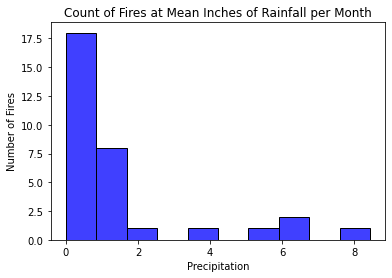

In [22]:
# Find distribution of precipitation variable
ax2 = sns.histplot(data = df , x = 'precipitation', color = 'blue')
ax2.set_xlabel('Precipitation')
ax2.set_ylabel('Number of Fires')

ax2.set_title('Count of Fires at Mean Inches of Rainfall per Month')

The precipitation histogram shows a higher concentration of wildfires occuring in low precipitation, with fewer cases occuring as precipitation increases. Precipitation is coded in terms of mean inches of rainfall per month in the area of the wildfire, so it makes sense that the more rainfall the fewer cases of wildfires. There does not seem to be any extreme cases of outliers in the precipitation distribution, though the wildfire case with a precipitation of 8 seems odd.

Text(0.5, 1.0, 'Count of Fires at Average Temperatures per Month')

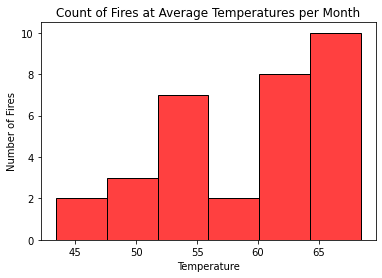

In [23]:
# Find distribution of temp variable
ax2 = sns.histplot(data = df , x = 'temp', color = 'red')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Number of Fires')

ax2.set_title('Count of Fires at Average Temperatures per Month')

The temperature histogram shows a higher concentration of wildfires occuring in higher temperatures. The count of wildfire cases seems to gradually slope off as temperature gets lower. Temperature is coded in terms of the monthly average temperature in the area of the wildfire, so it makes sense that the higher the temperatures the higher amount of wildfire cases. There does not seem to be any extreme cases of outliers in the precipitation distribution.

##### Relationships

Text(0.5, 1.0, 'Distribution of Fires at Different Temperatures and Precipitation Levels ')

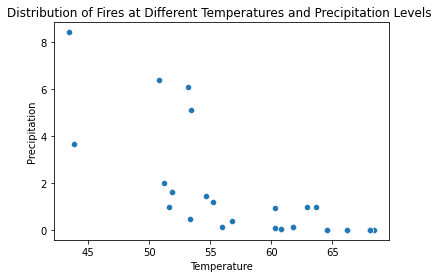

In [24]:
# Find relationship between temp and precipitation
ax = sns.scatterplot(data=df, x='temp', y='precipitation')
ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation')

ax.set_title('Distribution of Fires at Different Temperatures and Precipitation Levels ')

In a temperature vs precipitation scatter plot, there seems to be an inverse linear relationship between the two variables. Most of the cases are concentrated where temperatures are higher (50 < t < 70), and precipiation is lower (p < 2). There are a few wildfire cases that occur with lower temps and higher precipitations. There is also an extreme outlier, where a wildfire occured at both the lowest temperature and the highest precipitation. 

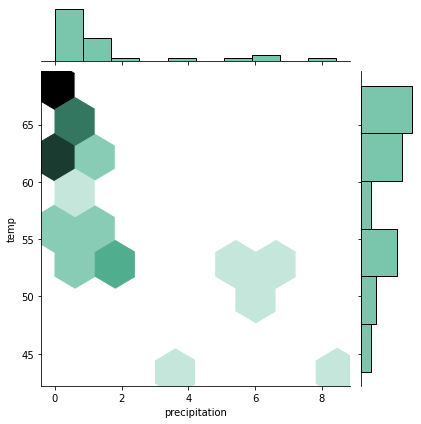

In [25]:
# See where most wildfires occur on a temp vs precipitation plot
sns.jointplot(data=df, x='precipitation', y='temp', kind="hex", color="#4CB391")

Similar to the scatterplot above, this hex plot shows that the highest concentration of wildfires occured at the lowest range of precipitation and the highest range of temperatures, and drops off steeply as precipiation increases and temperature lowers. 

### Temporality
The temporality of our data is represented by the year and month the alarm was called for each fire. Every datetime data point is from the Pacific Standard Time as all the data points are from northern California. These dates are represented in the dataframe as integers beginning with the four numbers of the year and ending with the last two digits of the specific month such that a data point with the date of  January of the year 2019 would look like (201901). 
In our dataset there were no null responses in any of the columns and therefore we did not need to set a date for null entries. We did begin with different dates in each of the data frames, for the fire data set the starting dates were represented by the year- month - day and time yet in the average precipitation and average temperature data sets the date were only provided as averages for each month thus to consolidate the data frames to only include the data points we wanted we changes the fire data set date format to match those in the precipitation and temperature data and used these dates to find the averages needed for each fire alarm date. 
In this data set the variables are stationary meaning that as time goes on the mean or average does not change because the dates simply represent the start of the fire and they do not influence any other variable within the dataset and thus should not influence the future mean and average predictions. 

### Faithfulness
Our data values are reasonable and what we would expect, as the dates are valid and drawn from counties in Northern California. Although we have some slight outliers, most of the data is clustered together and the outliers are still relatively plausible since our measurements of temperature are averages of temperatures per month, as opposed to the exact temperature of the start of the fire.
There are no inconsistencies across tables, as it makes sense that the higher the temperature, the less likely it is to rain or have precipitation, and no values are stored or counted more than once.
From our inspection, the data does not have inconsistencies or signs of falsification; our source (the Global Historical Climatology Network daily) also screens the data (for impossible values and extreme outliers such as those outside of 6 standard deviations of the surrounding data) before integrating it into their database which we used.
